In [267]:
# Import packages
import os
import sys
import warnings
import inspect
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from scipy.interpolate import make_interp_spline

# Set directories
notebook_dir = os.getcwd()
base_dir = os.path.join(notebook_dir, '..')
data_dir = os.path.join(base_dir, 'data', 'processed')
raw_data_dir = os.path.join(base_dir, 'data', 'raw')
src_dir = os.path.join(base_dir, 'src')
graph_dir = os.path.join(base_dir, 'results', 'graphs')
sys.path.append(src_dir)

In [268]:
# Load daily return data for ff6 and hxz
ff6_daily_df = pd.read_csv(os.path.join(data_dir, 'ff6_daily.csv'))
hxz_daily_df = pd.read_csv(os.path.join(data_dir, 'hxz_daily.csv'))
ff6_hxz_df = ff6_daily_df.merge(hxz_daily_df, on='Date').drop(['Mkt-RF', 'RF', 'RF_HXZ', 'Mkt-RF_HXZ'], axis=1)
ff6_hxz_df.rename(columns={'ME_HXZ': 'ME', 'IA_HXZ': 'IA', 'ROE_HXZ':'ROE', 'EG_HXZ': 'EG'}, inplace=True)
ff6_hxz_df['Date'] = pd.to_datetime(ff6_hxz_df['Date'])
ff6_hxz_df['year'] = ff6_hxz_df['Date'].dt.year
ff6_hxz_df.drop('Date', axis=1, inplace=True)
ff6_hxz_std_annual = ff6_hxz_df.groupby('year').std()
ff6_hxz_std_annual = ff6_hxz_std_annual * (252**0.5)
ff6_hxz_std_annual.drop(range(1967,1990), axis=0, inplace=True)

In [269]:
NYSE_SP500 = pd.read_csv(os.path.join(data_dir, 'NYSE_SP500.csv'))
NYSE_SP500['Date'] = pd.to_datetime(NYSE_SP500['Date'])
NYSE_SP500['year'] = NYSE_SP500['Date'].dt.year
NYSE_SP500.drop('Date', axis=1, inplace=True)
NYSE_SP500['NYSE'] = NYSE_SP500['CloseNYSE'].pct_change() * 100
NYSE_SP500['SP500'] = NYSE_SP500['CloseSP500'].pct_change() * 100
NYSE_SP500.drop(['CloseNYSE', 'CloseSP500'], axis=1, inplace=True)
NYSE_SP500_std_daily = NYSE_SP500.groupby('year')[['NYSE', 'SP500']].std()
NYSE_SP500_std_annual = NYSE_SP500_std_daily * (252**0.5)
NYSE_SP500_std_annual.drop(1989, axis=0, inplace=True)
merged_std_annual = NYSE_SP500_std_annual.merge(ff6_hxz_std_annual, on='year')

In [270]:
merged_std_annual_t = merged_std_annual.T
dummy_row = pd.DataFrame(np.nan, index=['Factors Below'], columns=merged_std_annual_t.columns)
# Adjust this based on where 'NYSE' and 'SP500' are in your DataFrame
part1 = merged_std_annual_t.loc[:'SP500']
part2 = merged_std_annual_t.loc['MOM':]
merged_heatmap_std = pd.concat([part1, dummy_row, part2])

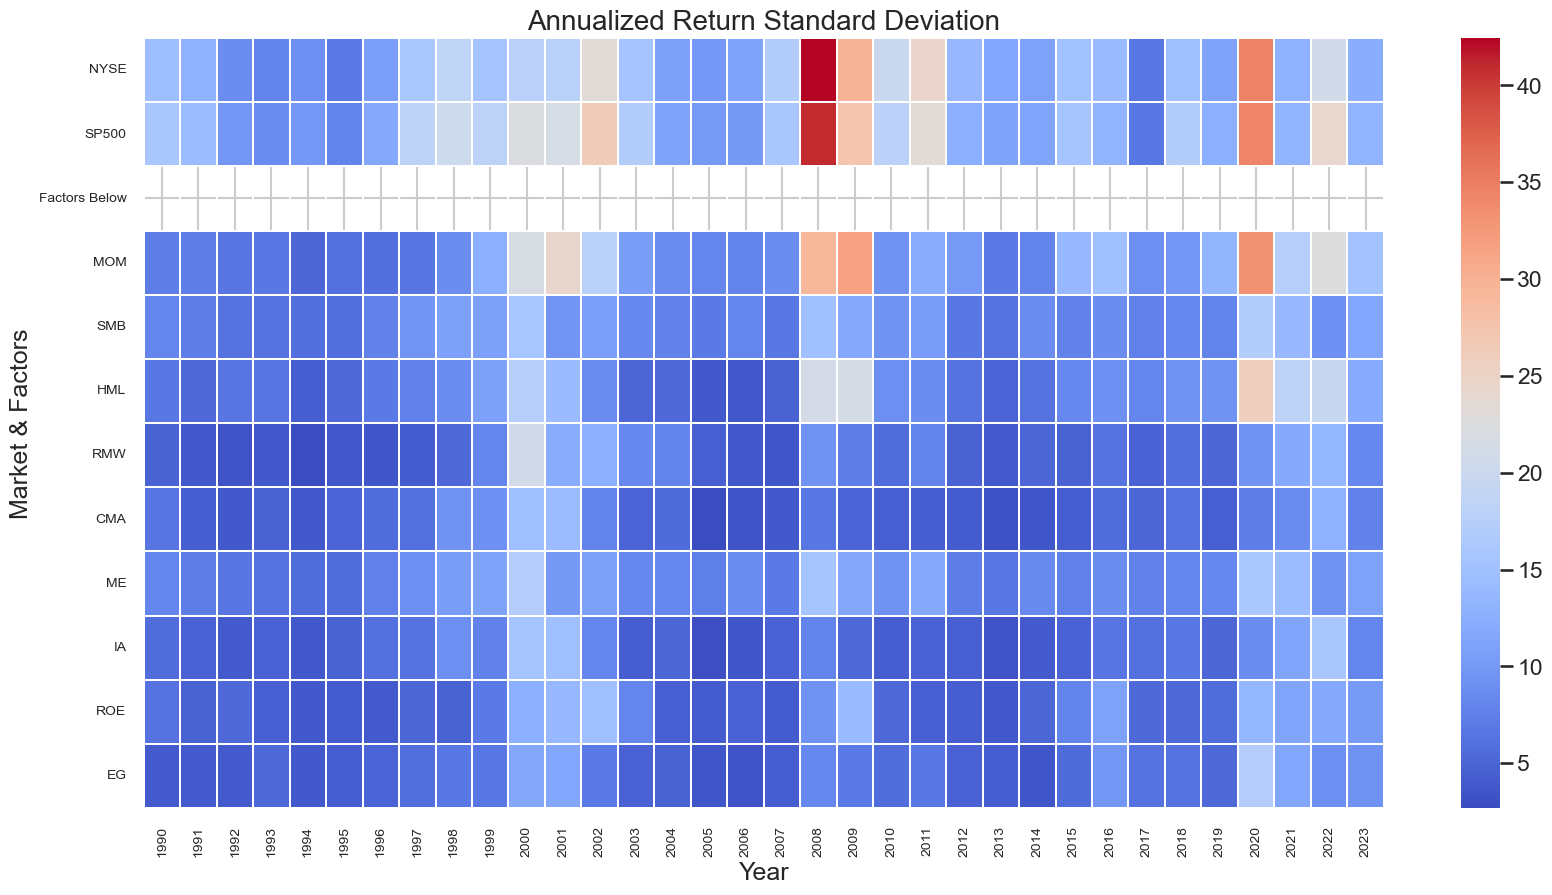

In [271]:
sns.set_context("talk")

# Create a heatmap with seaborn
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
heatmap = sns.heatmap(merged_heatmap_std, annot=False, fmt=".0f", cmap='coolwarm', linewidths=.1, annot_kws={"size": 15})

# Setting the title, x-label, and y-label
plt.title('Annualized Return Standard Deviation', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Market & Factors', fontsize=18)

# Adjusting the x and y ticks font size if necessary
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the heatmap to a file with a higher DPI for better resolution
#plt.savefig('heatmap_detailed.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [272]:
merged_std_annual_t['AvgAnnualStd'] = merged_std_annual_t.mean(axis=1).round(2)
merged_std_annual_t

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,AvgAnnualStd
NYSE,14.569924,13.038137,8.798203,7.829175,9.137931,6.949687,10.616217,16.148650,18.540277,15.266524,...,15.086384,14.073848,6.705240,14.702946,11.138844,34.648942,12.907243,20.842560,12.446781,15.86
SP500,15.949364,14.298733,9.682580,8.601159,9.844039,7.806597,11.780503,18.131112,20.287981,18.071231,...,15.493739,13.094963,6.685664,17.051556,12.472062,34.430996,13.100093,24.173530,13.092856,16.56
MOM,7.232262,7.313959,6.455833,6.730815,5.132263,5.951867,5.901833,6.424015,8.828777,12.555393,...,13.839996,14.913228,8.973691,9.733283,13.285525,33.248980,17.332797,22.587415,15.140809,12.84
SMB,8.020802,7.218733,6.216367,6.174229,5.811763,5.835486,7.669419,9.583394,10.810866,10.847877,...,7.676247,8.803052,7.547198,8.255072,7.888566,17.071827,13.898421,9.145688,11.442284,9.16
HML,6.658422,5.355061,6.435610,6.545581,4.317246,5.394790,6.958484,7.504161,8.623705,10.871820,...,8.183447,9.180056,7.972264,9.236780,9.327078,25.703542,18.083187,19.490537,12.093713,9.65
RMW,4.757090,3.805388,3.338908,3.839730,2.810012,3.622734,3.590022,4.126366,5.277568,7.995281,...,4.713385,6.305823,4.699023,5.788596,5.110849,9.221940,11.879683,13.496897,8.261582,6.77
CMA,6.498868,4.335959,3.806823,4.751438,3.846663,4.992729,5.769852,5.987919,9.367072,9.190048,...,4.279615,5.787069,5.099953,6.234722,4.535165,7.209393,8.682306,13.032578,7.675345,6.16
ME,7.987204,7.276597,6.438001,6.283513,5.706571,5.721063,7.581887,8.941452,10.361345,11.104441,...,7.642609,8.803755,7.683855,8.116934,8.189013,16.162483,14.274537,9.233200,10.975894,9.31
IA,5.749963,4.545979,3.938674,4.693235,3.650821,4.749045,6.040975,6.308212,9.021969,7.772462,...,4.684027,6.522362,6.090290,6.705703,5.120193,8.864076,11.258349,15.969725,8.073025,6.53
ROE,6.168461,4.761229,5.349997,4.540660,3.789218,4.163306,4.015441,5.032098,4.846689,6.876582,...,7.959325,10.944795,5.393335,5.401818,5.731594,13.474232,11.232978,11.905481,10.198261,7.21


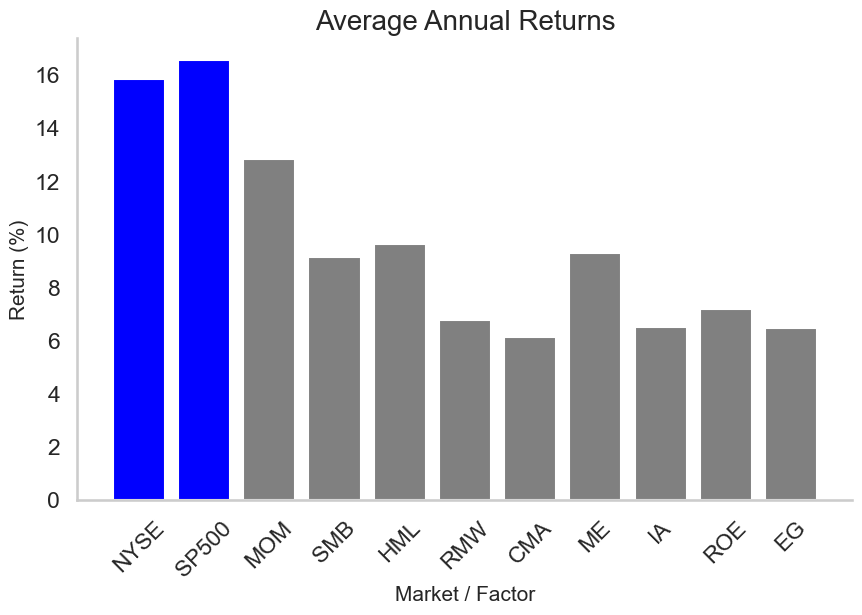

In [273]:
data = merged_std_annual_t['AvgAnnualStd']


colors = ['blue', 'blue'] + ['grey'] * (len(data) - 2) 

plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, data.values, color=colors)

plt.title('Average Annual Returns', fontsize=20)
plt.xlabel('Market / Factor', fontsize=15)
plt.ylabel('Return (%)', fontsize=15)

plt.grid(False)

plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()